In [1]:
# !pip install mpi4py

In [1]:
import mpi4py

print("mpi4py version:", mpi4py.__version__)

mpi4py version: 3.1.4


In [2]:
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print('Welcome to PDPU From processes %d of %d' % (rank, size))

Welcome to PDPU From processes 0 of 1


In [5]:
!mpirun -n 4 python script_openmpi.py

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!mpirun --version

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print('Welcome to PDPU From process %d of %d' % (rank, size))

# Adding a label to each statement based on the process number
if rank == 0:
    print('This statement is processed by the first thread')
if rank == 1:
    print('This statement is processed by the second thread')
elif rank == 2:
    print('This statement is processed by the third thread')
elif rank == 3:
    print('This statement is processed by the fourth thread')


Welcome to PDPU From process 0 of 1


In [10]:
!pip install skimage

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [13]:
import numpy as np
from skimage import data, img_as_float
from skimage.filters import sobel
import skimage.io
import os.path
import time
curPath = os.path.abspath(os.path.curdir)
noisyDir = os.path.join(curPath,'noisy')
denoisedDir = os.path.join(curPath,'denoised')
def loop(imgFiles):
    for f in imgFiles:
        img = img_as_float(data.load(os.path.join(noisyDir,f)))
        startTime = time.time()
        img = denoise_bilateral(img, sigma_range=0.1, sigma_spatial=3),
        skimage.io.imsave(os.path.join(denoisedDir,f), img)
        print("Took %f seconds for %s" %(time.time() - startTime, f))
    
def serial():
    total_start_time = time.time()
    imgFiles = ["%.4d.jpg"%x for x in range(1,101)]
    
    oop(imgFiles)
    print("Total time %f seconds" %(time.time() - total_start_time))
    
if __name__=='__main__':
    serial()

NameError: name 'oop' is not defined

In [50]:
import numpy as np
from skimage import data, img_as_float, io, restoration
import os.path
import time

curPath = os.path.abspath(os.path.curdir)
# noisyDir = os.path.join(curPath, 'noisy')

noisyDir = r"C:\Users\raval\Downloads\dog cat\dog cat\train\dogs"
denoisedDir = os.path.join(curPath, 'denoised')

def loop(imgFiles):
    for f in imgFiles:
        img = img_as_float(io.imread(os.path.join(noisyDir, f)))
        
        # Ensure the image is 2D for bilateral denoising
        img_2d = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))

        startTime = time.time()
        img_denoised_2d = restoration.denoise_bilateral(img_2d)
        
        # Reshape the denoised image back to its original shape
        img_denoised = img_denoised_2d.reshape((img.shape[0], img.shape[1], img.shape[2]))
        
        io.imsave(os.path.join(denoisedDir, f), img_denoised)
        print("Took %f seconds for %s" % (time.time() - startTime, f))

def serial():
    total_start_time = time.time()
#     imgFiles = ["%.4d.jpg" % x for x in range(1, 2)]
    
    for i in range(1, 101):  # Adjust the range based on your file names
        filename = str(i) + ".jpg"
        filepath = os.path.join(noisyDir, filename)

        if os.path.exists(filepath):
            imgFiles.append(filename)

    #     imgFiles = [""%.4d.jpg" % x for x in range(1, 100)]
    #     loop(imgFiles)
        print("Total time %f seconds" % (time.time() - total_start_time))

if __name__ == '__main__':
    serial()


Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.000974 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 seconds
Total time 0.002155 

In [36]:
!pip install opencv-python

Enter the path to the image file: C:\Users\raval\Downloads\dog cat\dog cat\train\dogs\dog_37.jpg


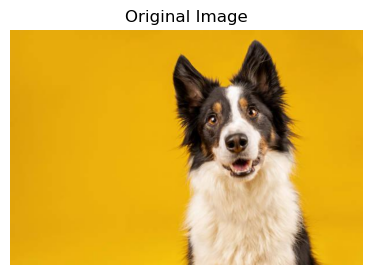

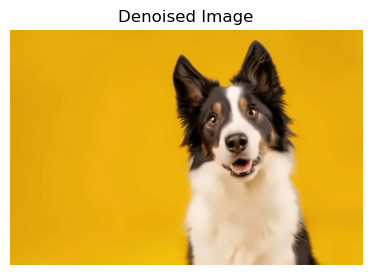

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

def main():
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()

    if rank == 0:
        image_path = input("Enter the path to the image file: ")
        image = cv2.imread(image_path)

        if image is None:
            print("Error: Unable to read image.")
            return

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        image_shape = np.array(image.shape, dtype=int)
    else:
        image_shape = np.empty(3, dtype=int)

    comm.Bcast(image_shape, root=0)

    if rank != 0:
        image = np.empty(image_shape, dtype=np.uint8)

    comm.Bcast(image, root=0)

    denoised_image = denoise_image(image)

    denoised_images = comm.gather(denoised_image, root=0)

    if rank == 0:
        final_denoised_image = np.vstack(denoised_images)

        plt.figure(figsize=(10,10))
        plt.subplot(1, 2, 2)
        plt.title('Denoised Image')
        plt.imshow(cv2.cvtColor(final_denoised_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.show()

if __name__ == "__main__":
    main()

In [51]:
import numpy as np
from skimage import img_as_float, io, restoration
import os.path
import time

curPath = os.path.abspath(os.path.curdir)
noisyDir = r"C:\Users\raval\Downloads\dog cat\dog cat\train\dogs"
denoisedDir = os.path.join(curPath, 'denoised')

def loop(imgFiles):
    for f in imgFiles:
        img = img_as_float(io.imread(os.path.join(noisyDir, f)))
        
        # Ensure the image is 2D for bilateral denoising
        img_2d = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))

        startTime = time.time()
        img_denoised_2d = restoration.denoise_bilateral(img_2d)
        
        # Reshape the denoised image back to its original shape
        img_denoised = img_denoised_2d.reshape((img.shape[0], img.shape[1], img.shape[2]))
        
        io.imsave(os.path.join(denoisedDir, f), img_denoised)
        print("Took %f seconds for %s" % (time.time() - startTime, f))

def serial():
    total_start_time = time.time()
    imgFiles = []

    for i in range(1, 101):  # Adjust the range based on your file names
        filename = str(i) + ".jpg"
        filepath = os.path.join(noisyDir, filename)

        if os.path.exists(filepath):
            imgFiles.append(filename)

    loop(imgFiles)
    print("Total time %f seconds" % (time.time() - total_start_time))

if __name__ == '__main__':
    serial()


Total time 0.003074 seconds
